# Proyecto 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import json

def load_json_data():
    with open("stations.json", "r") as f:
        data = json.load(f)
    df =  pd.DataFrame(data["stations"]) 
    df["lat"] = df["location"].map(lambda x: x["lat"])
    df["lon"] = df["location"].map(lambda x: x["lon"])
    df.drop(columns="location", inplace=True)
    df.set_index("id", inplace=True)
    return df

In [3]:
stations = load_json_data()
stations.head()

,name,address,addressNumber,zipCode,districtCode,districtName,altitude,nearbyStations,stationType,lat,lon
id,,,,,,,,,,,
448,448 DR. ANDRADE - ARCOS DE BELÉN,DR. ANDRADE ARCOS DE BELÉN,S/N,None,None,None,None,[448],"BIKE,TPV",19.426611,-99.144470
443,443 BRUNO TRAVEN-GOLONDRINAS,443 - Bruno Trave-Avenida México-Coyoacan,S/N,3340,1,Ampliación Granada,None,"[432, 442, 444]",BIKE,19.359655,-99.162025
463,463 LAGO ANDRÓMACO-LAGO ZURICH,463 LAGO ANDRÓMACO-LAGO ZURICH,S/N,None,1,Ampliación Granada,None,"[197, 242, 462]",BIKE,19.442338,-99.202492
416,416 RECREO-PARROQUÍA,416 - Recreo-Parroquía,S/N,3104,1,Ampliación Granada,None,"[390, 391, 415]",BIKE,19.371308,-99.177607
437,437 MORAS-COMUNAL,437 - Moras-Comunal,S/N,3240,1,Ampliación Granada,None,"[423, 436, 438]",BIKE,19.364808,-99.176022


In [4]:
stations.stationType.unique()

array(['BIKE,TPV', 'BIKE', 'ELECTRIC_BIKE'], dtype=object)

In [5]:
stations.describe()

,lat,lon
count,480.000000,480.000000
mean,19.409647,-99.170918
std,0.024425,0.015825
min,19.358270,-99.212845
25%,19.388946,-99.179836
50%,19.414846,-99.171091
75%,19.430649,-99.160599
max,19.446073,-99.130918


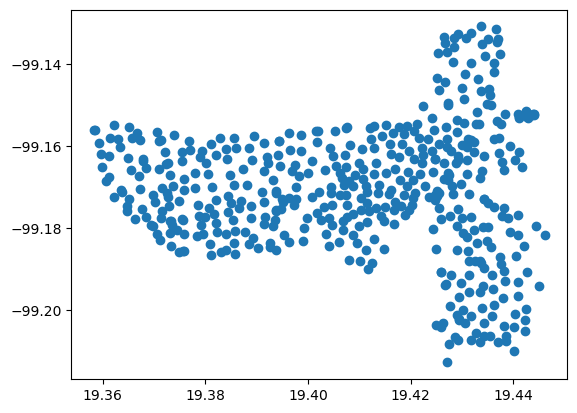

In [6]:
plt.scatter(stations.lat, stations.lon)

In [7]:
def load_travels_data(filename):
    data = pd.read_csv(filename)
    data.Ciclo_Estacion_Retiro = data.Ciclo_Estacion_Retiro.map(lambda x: x.split("-")[0]).astype(int)
    data.Ciclo_EstacionArribo = data.Ciclo_EstacionArribo.map(lambda x: x.split("-")[0]).astype(int)
    data.Hora_Retiro = data.Fecha_Retiro + "-" + data.Hora_Retiro
    data.Hora_Arribo = data.Fecha_Arribo + "-" + data.Hora_Arribo
    data.Genero_Usuario = data.Genero_Usuario.map(lambda x: 1 if x=="F" else 0)
    # data.Fecha_Retiro = pd.to_datetime(data.Fecha_Retiro, dayfirst=True)
    # data.Fecha_Arribo = pd.to_datetime(data.Fecha_Arribo, dayfirst=True)
    data.drop(columns=["Fecha_Retiro", "Fecha_Arribo"], inplace=True)
    data.Hora_Retiro = pd.to_datetime(data.Hora_Retiro, dayfirst=True).map(lambda x:x.timestamp())
    data.Hora_Arribo = pd.to_datetime(data.Hora_Arribo, dayfirst=True).map(lambda x:x.timestamp())
    data = data[data.Ciclo_Estacion_Retiro <= 480]
    data = data[data.Ciclo_EstacionArribo <= 480]
    data["lat_Arribo"] = data.Ciclo_EstacionArribo.map(stations["lat"])
    data["lon_Arribo"] = data.Ciclo_EstacionArribo.map(stations["lon"])
    data["lat_Retiro"] = data.Ciclo_Estacion_Retiro.map(stations["lat"])
    data["lon_Retiro"] = data.Ciclo_Estacion_Retiro.map(stations["lon"])
    return data


In [8]:
data = load_travels_data("2024-12.csv")

In [9]:
# data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1112532 entries, 0 to 1680648
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Genero_Usuario         1112532 non-null  int64  
 1   Edad_Usuario           1112381 non-null  float64
 2   Bici                   1112532 non-null  int64  
 3   Ciclo_Estacion_Retiro  1112532 non-null  int64  
 4   Hora_Retiro            1112532 non-null  float64
 5   Ciclo_EstacionArribo   1112532 non-null  int64  
 6   Hora_Arribo            1112532 non-null  float64
 7   lat_Arribo             1112532 non-null  float64
 8   lon_Arribo             1112532 non-null  float64
 9   lat_Retiro             1112532 non-null  float64
 10  lon_Retiro             1112532 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 101.9 MB


In [10]:
data.describe()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Hora_Arribo,lat_Arribo,lon_Arribo,lat_Retiro,lon_Retiro
count,1.112532e+06,1.112381e+06,1.112532e+06,1.112532e+06,1.112532e+06,1.112532e+06,1.112532e+06,1.112532e+06,1.112532e+06,1.112532e+06,1.112532e+06
mean,2.776972e-01,3.423391e+01,5.454950e+06,1.858563e+02,1.734193e+09,1.811967e+02,1.734194e+09,1.941636e+01,-9.916907e+01,1.941605e+01,-9.916994e+01
std,4.478634e-01,9.818079e+00,2.032938e+06,1.346733e+02,7.365035e+05,1.329474e+02,7.364522e+05,1.955045e-02,1.465760e-02,1.966108e-02,1.492764e-02
min,0.000000e+00,1.600000e+01,2.000461e+06,1.000000e+00,1.723797e+09,1.000000e+00,1.733011e+09,1.935827e+01,-9.921285e+01,1.935827e+01,-9.921285e+01
25%,0.000000e+00,2.700000e+01,3.712726e+06,6.600000e+01,1.733550e+09,6.400000e+01,1.733550e+09,1.940677e+01,-9.917748e+01,1.940630e+01,-9.917826e+01
50%,0.000000e+00,3.200000e+01,5.449988e+06,1.620000e+02,1.734100e+09,1.540000e+02,1.734101e+09,1.942114e+01,-9.916824e+01,1.942080e+01,-9.916959e+01
75%,1.000000e+00,3.900000e+01,7.222243e+06,2.820000e+02,1.734711e+09,2.710000e+02,1.734711e+09,1.943099e+01,-9.915991e+01,1.943096e+01,-9.916050e+01
max,1.000000e+00,1.240000e+02,8.999708e+06,4.800000e+02,1.735689e+09,4.800000e+02,1.735690e+09,1.944607e+01,-9.913092e+01,1.944607e+01,-9.913092e+01


In [11]:
X = data[["Ciclo_Estacion_Retiro", "Hora_Arribo", "lat_Arribo", "lon_Arribo"]]
X.head()

,Ciclo_Estacion_Retiro,Hora_Arribo,lat_Arribo,lon_Arribo
0,198,1.733011e+09,19.404720,-99.174480
1,6,1.733011e+09,19.441110,-99.161640
2,237,1.733011e+09,19.427317,-99.166662
3,214,1.733011e+09,19.440077,-99.204316
4,43,1.733011e+09,19.435354,-99.147742


In [12]:
X[X.Ciclo_Estacion_Retiro == 1]

,Ciclo_Estacion_Retiro,Hora_Arribo,lat_Arribo,lon_Arribo
610,1,1.733032e+09,19.414773,-99.178433
1193,1,1.733038e+09,19.435354,-99.147742
1445,1,1.733039e+09,19.441110,-99.161640
2052,1,1.733042e+09,19.430922,-99.166959
2177,1,1.733042e+09,19.431386,-99.171695
...,...,...,...,...
1678425,1,1.735679e+09,19.429241,-99.163377
1678466,1,1.735680e+09,19.437670,-99.164020
1678528,1,1.735680e+09,19.441110,-99.161640
1678837,1,1.735681e+09,19.430922,-99.166959


In [13]:
X[X.Ciclo_Estacion_Retiro == 2]

,Ciclo_Estacion_Retiro,Hora_Arribo,lat_Arribo,lon_Arribo
255,2,1.733012e+09,19.439249,-99.181065
851,2,1.733036e+09,19.425020,-99.172310
1018,2,1.733037e+09,19.422705,-99.169922
1137,2,1.733037e+09,19.427838,-99.161193
1462,2,1.733039e+09,19.420419,-99.172676
...,...,...,...,...
1678767,2,1.735680e+09,19.428210,-99.139490
1678907,2,1.735681e+09,19.431386,-99.171695
1679743,2,1.735685e+09,19.424725,-99.163331
1680197,2,1.735687e+09,19.431386,-99.171695
